<a href="https://colab.research.google.com/github/MissMukuru/-Overfit_n_Chill/blob/main/Image_classifier_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras import layers, models
from  tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
#Normalising  the pixel values
#0 - 255 is  the ggrayscale images, it scales to the ange 0-1 which helps the network train faster and perform better
X_train,X_test = X_train/255,X_test/255

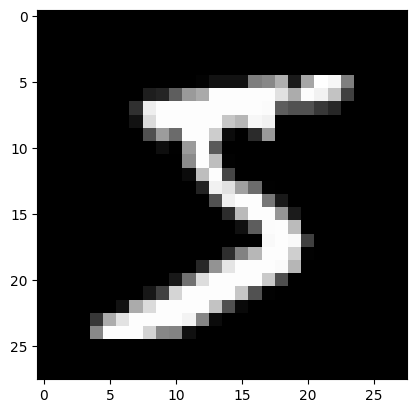

In [5]:
#Visualise a sample image
plt.imshow(X_train[0], cmap = 'gray')
plt.show()


Sequential helps stackk layers ane after another and is useful when each layyer takes oen iput and produces one output

Each late is like a function that trannsforms data and has trainable values (weights and biases) that the model learns from the data, and you can reuse layes in different models.
Flattenning means converting a 2D or 3D into a 1D( single line of numbers)

In [6]:
#Building  the neural network
model = Sequential(
    [Flatten(input_shape = (28 ,28)),#converts them into a 1D array,because dense layers require a 1d input
    Dense(128, activation = 'relu'),#this is the hidden layer with 128 neurons
    #the relu = rectified Linear Unit, it keeps the ppositive values as they are and sets the negative values to zero
    Dense(10, activation  = 'softmax')]#This is the output layer and it ahas 10 neurons for each digit (0-9)
    #the softmax function converts the output into  probabilities(each neuron  represents the pprobability of a digit)
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
#Now compiling the model
model.compile(
    optimizer =  'adam',#disstibutes the weights efficiently
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [8]:
model.fit(X_train, y_train,epochs = 5, validation_data = (X_test,y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8756 - loss: 0.4378 - val_accuracy: 0.9593 - val_loss: 0.1369
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9622 - loss: 0.1241 - val_accuracy: 0.9690 - val_loss: 0.1029
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9771 - loss: 0.0770 - val_accuracy: 0.9737 - val_loss: 0.0875
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9827 - loss: 0.0599 - val_accuracy: 0.9722 - val_loss: 0.0899
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9870 - loss: 0.0439 - val_accuracy: 0.9757 - val_loss: 0.0745


In [9]:
#We then evaluate the model peformance
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'test_accuracy: {test_acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9720 - loss: 0.0863
test_accuracy: 0.9757000207901001


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


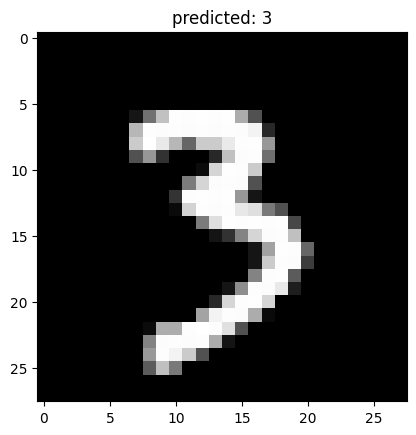

In [10]:
#then we make predictions on the data
prediction = model.predict(X_test)

#i need to show the predictions
index = 30
plt.imshow(X_test[index], cmap = 'grey')
plt.title(f"predicted: {np.argmax(prediction[index])}")
plt.show()

# CONVOLUTIONAL NEURAL NETWORKS

**NOW WE COMPARE THE ARTIFICIAL NEURAL NETWORK AND THE CONVOLUTION NEURAL NETWORKS**

We will look at the syntax, the sematics and the diffeence in accuary is at all there is any.

In [11]:
#Reshape data to add a single channel(grayscale images)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [12]:
#defining the CNN model
#defining the CNN model
model = Sequential([
    #First CNN layer
    layers.Conv2D(32, (3,3), activation =  'relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),

    #Second CNN layer
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    #Third CNN layer
    layers.Flatten(),
    layers.Dense(128,activation = 'relu'),#This is the fully connected layer
    layers.Dense(10, activation = 'softmax')#This is th output layer(10 classes)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In CNNs Flatten is used to connect the convolutional part to the fully connected layers

Dense() is a fully connected layer where every neuron is connected to every neuron in the next layer, they are used for decision making in the neural network


In [13]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
#Taining the model
history =model.fit(X_train,y_train, epochs = 10, validation_data = (X_test, y_test))


Epoch 1/10
 228/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 30ms/step - accuracy: 0.7152 - loss: 0.9143

In [ ]:
test_loss,test_acc =  model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

In [ ]:
#Plotting the accuaraacy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],  label = 'Training_accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation_accuracy')
plt.title('Modell accuracy')
plt.legend()

Remember that the **training accuracy** represents how well your model predicts on the data it was trained on and the **validation accuracy** represents how well your model genalizes to new unseen data

Since via teh graph we can tell that we only have a small difference in the two, it means we hae Good generalization and and some slight overfittng which is acceptable

In [ ]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = "Training loss")
plt.plot(history.history['val_loss'],label = 'Validation loss')
plt.title('Model loss')
plt.legend()
plt.show()

This is a scenario where your training loss is higher than the validation loss and exhibiting an upward trend while the validation loss is decreasing (plummeting)





This is sometimes common especially when there might be differences in the distribution or characteristics of your training and validation datasets.

